# Project 2 - the Kohonen algorithm

By: Avia Oren & Maya Hayat


### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

## Step 1: create the sample data

In [2]:
num_points = 1000 # we chose 1000 as the number of data points as it is way more than the number of neurons.

# Generate the points randomly where 0<=x<=1 and 0<=y<=1 
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

# Combine the x and y coordinates to create the data points
data = np.column_stack((x, y))
test_set  = data[:100,:]
train_set = data[100: , :]

## Step 2 : The algorithm

In [3]:
# Initialize weights randomlly as mentioned in class, input dim is always 2 as we're dealing only with 2D shapes
def initialize_weights(num_neurons, input_dim):
    return np.random.rand(num_neurons, input_dim)

# Finding the best matching unit using euclidean
def find_bmu(input_vector, weights):
    distances = np.linalg.norm(input_vector - weights, axis=1)
    best_match = np.argmin(distances)
    return best_match

# Updating the weights, note that we have to set the neibourhood radius
def update_weights(input_vector, weights, best_match, learning_rate, neighborhood_radius):
    influence = np.exp(-np.square(np.arange(weights.shape[0]) - best_match) / (2 * neighborhood_radius**2))
    #the actual update (depends on learning rate as well as the weights, distance and so on)
    weights += learning_rate * influence[:, np.newaxis] * (input_vector - weights)

# Training the Kohonen algorithm
def train_som(data, num_neurons, input_dim, epochs, learning_rate, starting_neighborhood_radius):
    new_weights = initialize_weights(num_neurons, input_dim)
    
    for epoch in range(epochs):
        # The learning rate and neighborhood radius over time
        curr_learning_rate = learning_rate * (1 - epoch / num_epochs)
        curr_radius = starting_neighborhood_radius * (1 - epoch / num_epochs)

        for input_vector in data:
            # Find the BMU and update its weights
            bmu_index = find_bmu(input_vector, new_weights)
            update_weights(input_vector, new_weights, bmu_index, curr_learning_rate, curr_radius)

    return new_weights



## Step 3 - Create the Hand-like Figure 

In [4]:
points = []
# creating the thumb using 250 points in range 100-250
for j in range(250):
    x = np.random.randint(100, 250)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# creating the index finger using 250 points in range 350-500
for j in range(250):
    x = np.random.randint(350, 500)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# creating the middle finger using 250 points in range 600-750
for j in range(250):
    x = np.random.randint(600, 750)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))

# creating the ring finger using 250 points in range 850-1000
for j in range(250):
    x = np.random.randint(850, 1000)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# Creating the bottom part of the hand
for i in range(1000):
    x = np.random.randint(100, 1000)
    y = np.random.randint(0, 400)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))

In [5]:
# Convert the list of points into the appropriate format
data = np.array(points)


In [6]:
# Define the parameters for the SOM
num_neurons = 400  # Number of neurons in the mesh
input_dim = 2  # Dimensionality of the input data
learning_rate = 0.1  # Learning rate
initial_radius = 10  # Initial neighborhood radius

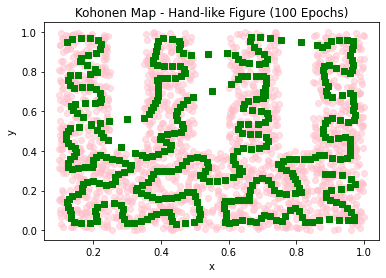

In [7]:
num_epochs = 100  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)


plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (100 Epochs)')
plt.show()

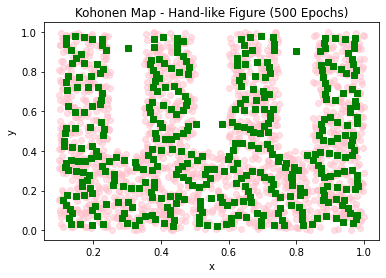

In [8]:
num_epochs = 500  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)


plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (500 Epochs)')
plt.show()

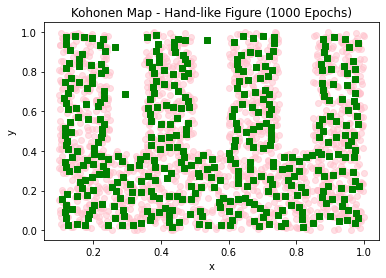

In [9]:
num_epochs = 1000  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)


plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (1000 Epochs)')
plt.show()

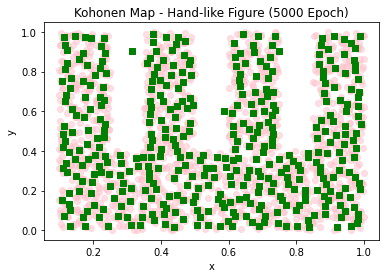

In [10]:
num_epochs = 5000  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)


plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (5000 Epoch)')
plt.show()

## Step 4 - Removing a finger 

In [4]:
points = []
# creating the thumb using 250 points in range 100-250
for j in range(250):
    x = np.random.randint(100, 250)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# creating the index finger using 250 points in range 350-500
for j in range(250):
    x = np.random.randint(350, 500)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# Removed the middle finger which was using 250 points in range 600-750

# creating the ring finger using 250 points in range 850-1000
for j in range(250):
    x = np.random.randint(850, 1000)
    y = np.random.randint(400, 1000)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))
        
# Creating the bottom part of the hand
for i in range(1000):
    x = np.random.randint(100, 1000)
    y = np.random.randint(0, 400)
    if (x / 1000, y / 1000) not in points:
        points.append((x / 1000, y / 1000))

In [5]:
# Convert the list of points into the appropriate format
data = np.array(points)

In [6]:
# Define the parameters for the SOM
num_neurons = 400  # Number of neurons in the mesh
input_dim = 2  # Dimensionality of the input data
learning_rate = 0.1  # Learning rate
initial_radius = 10  # Initial neighborhood radius

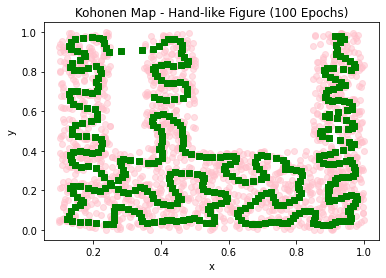

In [7]:
num_epochs = 100  # Number of training epochs


# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (100 Epochs)')
plt.show()


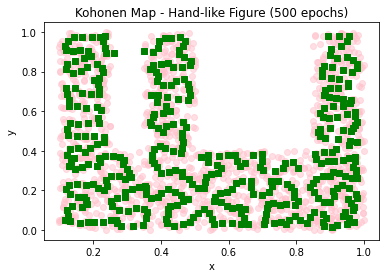

In [8]:
num_epochs = 500  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (500 epochs)')
plt.show()


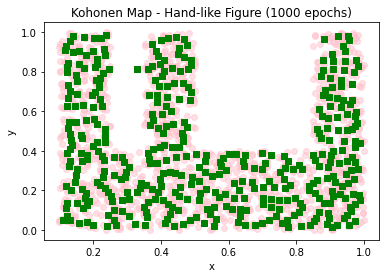

In [10]:
num_epochs = 1000  # Number of training epochs


# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (1000 epochs)')
plt.show()


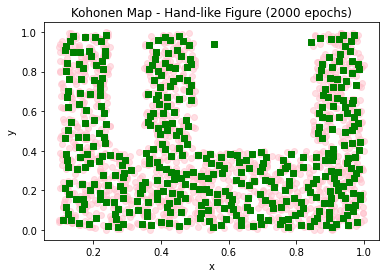

In [11]:
num_epochs = 2000  # Number of training epochs


# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (2000 epochs)')
plt.show()


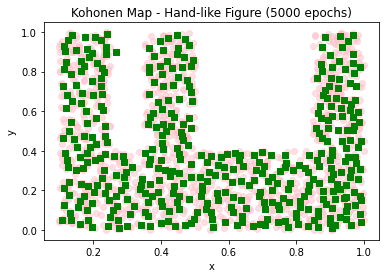

In [12]:
num_epochs = 5000  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (5000 epochs)')
plt.show()


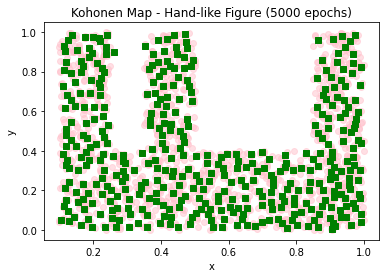

In [13]:
num_epochs = 10000  # Number of training epochs

# Train the SOM
new_weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the mesh superimposed on the hand-like figure
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green', marker='s')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Hand-like Figure (5000 epochs)')
plt.show()
